In [90]:
# Import needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [91]:
# Reading data as a dataframe
stores_df = pd.read_csv('/content/drive/MyDrive/DTM14 & MDTM15/stores_data_set.csv')
features_df = pd.read_csv('/content/drive/MyDrive/DTM14 & MDTM15/Features_data_set.csv')
sales_df = pd.read_csv('/content/drive/MyDrive/DTM14 & MDTM15/sales_data_set.csv')
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [92]:
# Shapes of the dataframes
print('Stores_df Shape  :',stores_df.shape)
print('Sales_df Shape   :',sales_df.shape)
print('Features_df Shape:',features_df.shape)

Stores_df Shape  : (45, 3)
Sales_df Shape   : (421570, 5)
Features_df Shape: (8190, 12)


In [93]:
# value_counts of Store Type
stores_df.Type.value_counts()

Type
A    22
B    17
C     6
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='Size'>

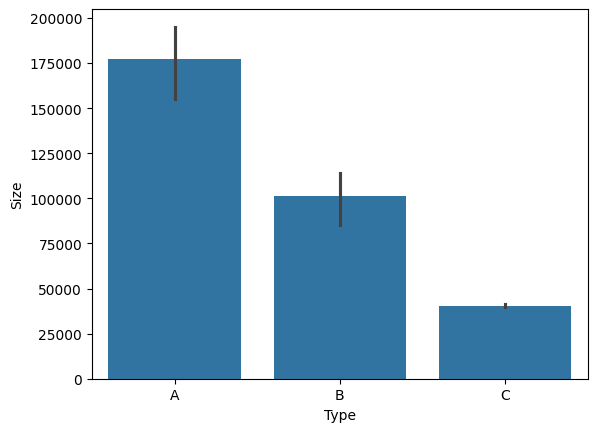

In [94]:
# Store Type bar plot
sns.barplot(data=stores_df,x='Type',y='Size')

From above bar plot we can know Type A has a heighest size average

<Axes: xlabel='Type', ylabel='count'>

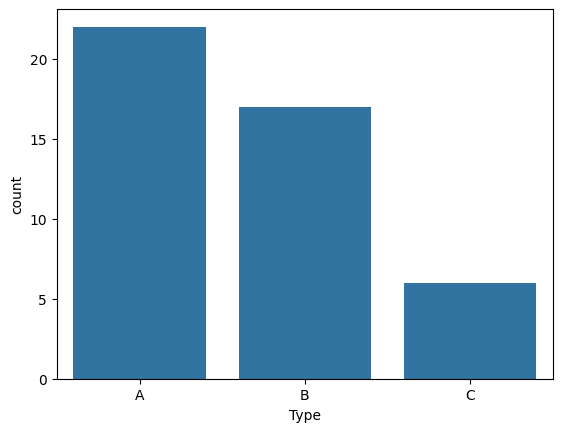

In [95]:
sns.countplot(data=stores_df,x='Type')

From the above plot we can know most number of stores are present in Type A

In [96]:
# Sales table shows 1st 5 rows
sales_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


All Days in Date column are Friday

In [97]:
# Getting count of holidays
sales_df.IsHoliday.value_counts()

IsHoliday
False    391909
True      29661
Name: count, dtype: int64

In [98]:
# Date Type conversion
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format="%d/%m/%Y")

In [99]:
# Description of Sales DF
sales_df.Date.describe()

count                           421570
mean     2011-06-18 08:30:31.963375104
min                2010-02-05 00:00:00
25%                2010-10-08 00:00:00
50%                2011-06-17 00:00:00
75%                2012-02-24 00:00:00
max                2012-10-26 00:00:00
Name: Date, dtype: object

# **Data Preprocessing**

In [100]:
# DataFrame merge of stores_df sales_df
new_sales_df = pd.merge(stores_df,sales_df,on='Store')
new_sales_df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,2010-02-05,24924.50,False
1,1,A,151315,1,2010-02-12,46039.49,True
2,1,A,151315,1,2010-02-19,41595.55,False
3,1,A,151315,1,2010-02-26,19403.54,False
4,1,A,151315,1,2010-03-05,21827.90,False
...,...,...,...,...,...,...,...
421565,45,B,118221,98,2012-09-28,508.37,False
421566,45,B,118221,98,2012-10-05,628.10,False
421567,45,B,118221,98,2012-10-12,1061.02,False
421568,45,B,118221,98,2012-10-19,760.01,False


In [101]:
# Shape of dataframe before and after merging
print('Shape of sales_df Before merging :',sales_df.shape)
print('Shape of sales_df After merging  :',new_sales_df.shape)

Shape of sales_df Before merging : (421570, 5)
Shape of sales_df After merging  : (421570, 7)


In [102]:
# Date type conversion
features_df['Date'] = pd.to_datetime(features_df['Date'], format="%d/%m/%Y")

In [103]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [104]:
# Description of features_df
features_df.Date.describe()

count                   8190
mean     2011-10-31 12:00:00
min      2010-02-05 00:00:00
25%      2010-12-17 00:00:00
50%      2011-10-31 12:00:00
75%      2012-09-14 00:00:00
max      2013-07-26 00:00:00
Name: Date, dtype: object

In [105]:
# Merging of new_sales_df and features_df
final_sales_df = pd.merge(new_sales_df,features_df,on=['Store','Date','IsHoliday'],how='inner')

In [106]:
print('Data Before merging :',new_sales_df.shape)
print('Data After merging  :',final_sales_df.shape)

Data Before merging : (421570, 7)
Data After merging  : (421570, 16)


In [107]:
# This is the final df of this problem
final_sales_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [108]:
# Detecting null values in final_sales_df
final_sales_df.isnull().sum()

Store                0
Type                 0
Size                 0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [109]:
# Detecting null values in features_df
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [110]:
# Null Values Percentage in MarkDown columns
li = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
for i in li:
 print(i,'------->',(final_sales_df[i].isnull().sum()/final_sales_df.shape[0])*100,'%')

MarkDown1 -------> 64.25718148824632 %
MarkDown2 -------> 73.61102545247527 %
MarkDown3 -------> 67.48084541120099 %
MarkDown4 -------> 67.98467632896079 %
MarkDown5 -------> 64.07903788220224 %


In [111]:
# Filling null values with 0
final_sales_df.fillna(0,inplace=True)

In [112]:
# Label enconding of Type and IsHoliday Column
le = LabelEncoder()
final_sales_df['Type'] = le.fit_transform(final_sales_df.Type)
final_sales_df['IsHoliday'] = le.fit_transform(final_sales_df.IsHoliday)
final_sales_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,151315,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,0,151315,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
2,1,0,151315,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
3,1,0,151315,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
4,1,0,151315,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106


# **EDA**

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

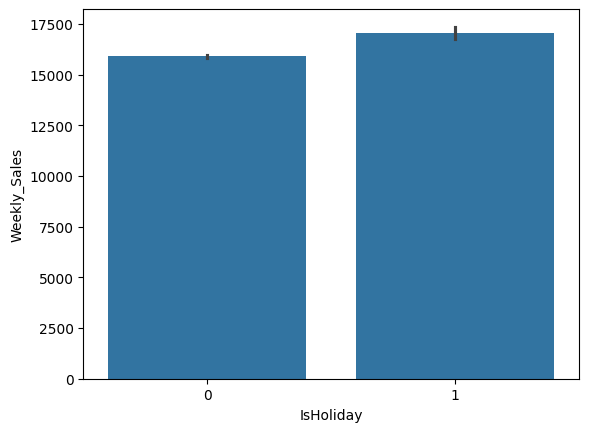

In [113]:
# bar plot for Holiday
sns.barplot(data=final_sales_df,x='IsHoliday',y='Weekly_Sales')

From above plot more sales happen on Holidays

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

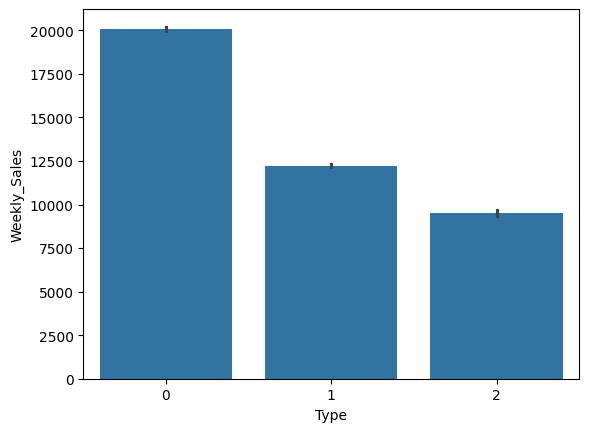

In [114]:
sns.barplot(data=final_sales_df,x='Type',y='Weekly_Sales')

Above bar plot it indicates Type A has highest weekly sales

## **Feature Engineering**

In [115]:
# Separate column for Date column
df1 = final_sales_df
df1['year'] = df1.Date.dt.year
df1['month'] = df1.Date.dt.month
df1['day'] = df1.Date.dt.day

In [116]:
# Finding average weekly sales for particular store and department
avg = df1.groupby(['Store','Dept'])['Weekly_Sales'].mean()
ws = avg.reset_index(drop=False)
ws.rename(columns={'Weekly_Sales':'Avg_Weekly_Sales'},inplace=True)

In [117]:
# Getting top 10 store department with high average weekly sales
res1 = ws.sort_values(by='Avg_Weekly_Sales',ascending=False).head(10)

In [118]:
# Avg_Weekly_sales merge with existing final dataframe
df2 = pd.merge(df1,ws,on=['Store','Dept'],how='inner')
df2.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day,Avg_Weekly_Sales
0,1,0,151315,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,22513.322937
1,1,0,151315,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,12,22513.322937
2,1,0,151315,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,19,22513.322937
3,1,0,151315,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,26,22513.322937
4,1,0,151315,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,5,22513.322937


In [119]:
# Finding the Standard Deviation for weekly sales for particular store and department
grp = df2.groupby(['Store','Dept'])['Weekly_Sales'].std()
sds = grp.reset_index(drop=False)
sds.rename(columns={'Weekly_Sales':'Std_dev_sales'},inplace=True)

In [120]:
# Getting top 10 store department with high average weekly sales
res2 = sds.sort_values(by='Std_dev_sales',ascending=False).head(10)

In [121]:
# Merging with existing final dataframe
df2 = pd.merge(df2,sds,on=['Store','Dept'],how='inner')
df2.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day,Avg_Weekly_Sales,Std_dev_sales
0,1,0,151315,1,2010-02-05,24924.50,0,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,2010,2,5,22513.322937,9854.349032
1,1,0,151315,1,2010-02-12,46039.49,1,38.51,2.548,0.0,...,0.0,0.0,0.0,211.242170,8.106,2010,2,12,22513.322937,9854.349032
2,1,0,151315,1,2010-02-19,41595.55,0,39.93,2.514,0.0,...,0.0,0.0,0.0,211.289143,8.106,2010,2,19,22513.322937,9854.349032
3,1,0,151315,1,2010-02-26,19403.54,0,46.63,2.561,0.0,...,0.0,0.0,0.0,211.319643,8.106,2010,2,26,22513.322937,9854.349032
4,1,0,151315,1,2010-03-05,21827.90,0,46.50,2.625,0.0,...,0.0,0.0,0.0,211.350143,8.106,2010,3,5,22513.322937,9854.349032


In [122]:
df2.fillna(0,inplace=True)

# **Model Training**

In [123]:
# Separating features and target
x = df2.drop(columns=['Date','Weekly_Sales'])
y = df2.Weekly_Sales

In [124]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

## **Random Forest Regressor**

In [125]:
# Model Training
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50,max_depth=20)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [126]:
# training and test Scores
print("Traning Score :",model.score(x_train,y_train))
print("Test Score :",model.score(x_test,y_test))

Traning Score : 0.9926244363775353
Test Score : 0.9671084344592349


In [127]:
# R2 evaluation result
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9671084344592349

## **Linear Regression**

In [128]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [129]:
# training and test Scores
print("Traning Score :",model.score(x_train,y_train))
print("Test Score :",model.score(x_test,y_test))

Traning Score : 0.9036388663711208
Test Score : 0.9108278403444274


In [130]:
# R2 evaluation result
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9108278403444274

These models predict weekly sales effectively. The Random Forest Regressor performs better compared to linear regression.

# **Conclusion**

These are the tips to increse the weekly sales :

*  Implementing a combination of the strategies like giving additional Markdown on Non-Holidays can help improve weekly sales and drive business growth
*   Giving some extra markdown for stock clearance of stagnant stock will improve the weekly sales.


*   For these particular departments in the particular stores has a heighest weekly sales average, giving extra markdowns and  purchasing additional inventory for the store can help increase the weekly sales.  




.




In [131]:
res1[['Store','Dept']]

,Store,Dept
1057,14,92
147,2,92
1523,20,92
980,13,92
297,4,92
1526,20,95
300,4,95
2061,27,92
1060,14,95
150,2,95




*   These are the stores has the heighest standard deviation on weekly sales. It indicates significant variability suggesting some weeks have much higher or lower sales than others. One important factor contributing for this varability is **Holiday**.


*   So, Increasing the inventory is the best option to increase the weekly sales on holidays. And reduce the work force and inventory on Non holidays can help to save unnecessary expenditure.






In [132]:
res2[['Store','Dept']]

,Store,Dept
736,10,72
2635,35,72
1044,14,72
1510,20,72
685,10,7
284,4,72
994,14,7
2048,27,72
1663,22,72
1740,23,72
